# CUSTOMER CHURN  PREDICTION

## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , ConfusionMatrixDisplay

## Reading The Dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Checking The Dataset For Preprocessing

In [5]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
dataset.shape

(10000, 14)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [17]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Renaming Columns For Better Readability

In [19]:
dataset.rename(columns={'Exited':'Churned'},inplace=True)
dataset.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
5348,5349,15720511,Byrne,547,Germany,Male,41,3,151191.31,1,1,0,175295.89,1
1578,1579,15585047,Onyemere,715,France,Male,28,7,160376.61,1,0,0,196853.11,0
1702,1703,15713644,Marshall,686,Spain,Male,22,5,0.00,2,1,0,158974.45,0
1363,1364,15789095,T'ang,775,Spain,Male,30,4,0.00,2,0,1,57461.13,0
6609,6610,15766047,Sukhorukova,748,France,Female,41,2,91621.69,1,1,1,71139.31,0


## Visualize The Distribution Of A "Churned" Column

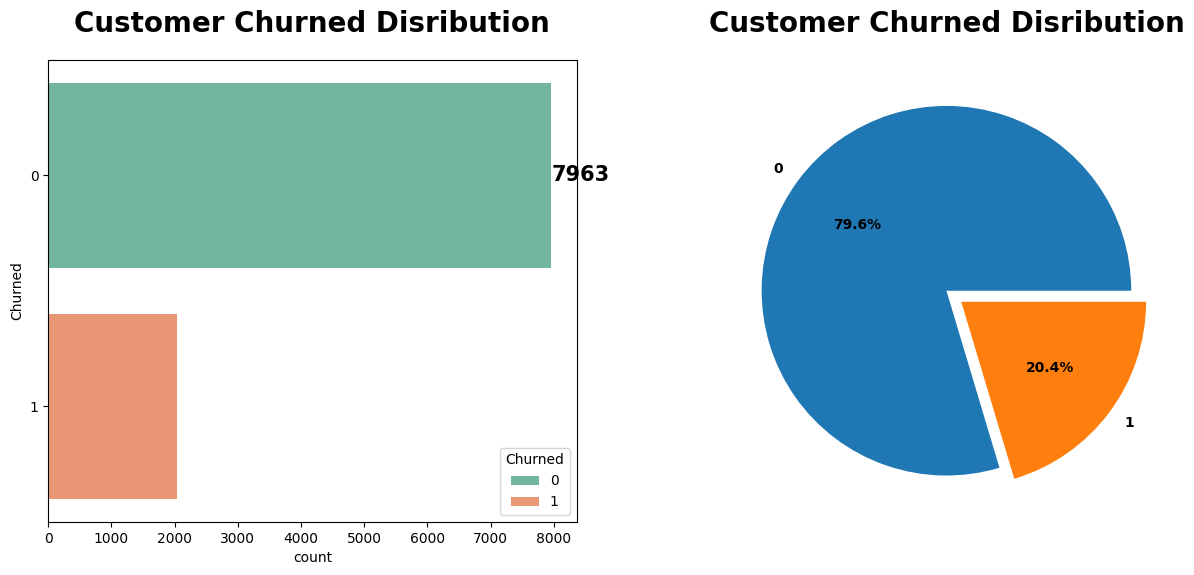

In [21]:
count = dataset["Churned"].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(y ="Churned" ,data = dataset , hue="Churned",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

## Making A Function That Generates A Count Plot (bar plot) For Any Given Column

In [23]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=dataset, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(dataset[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

In [25]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churned'],
      dtype='object')

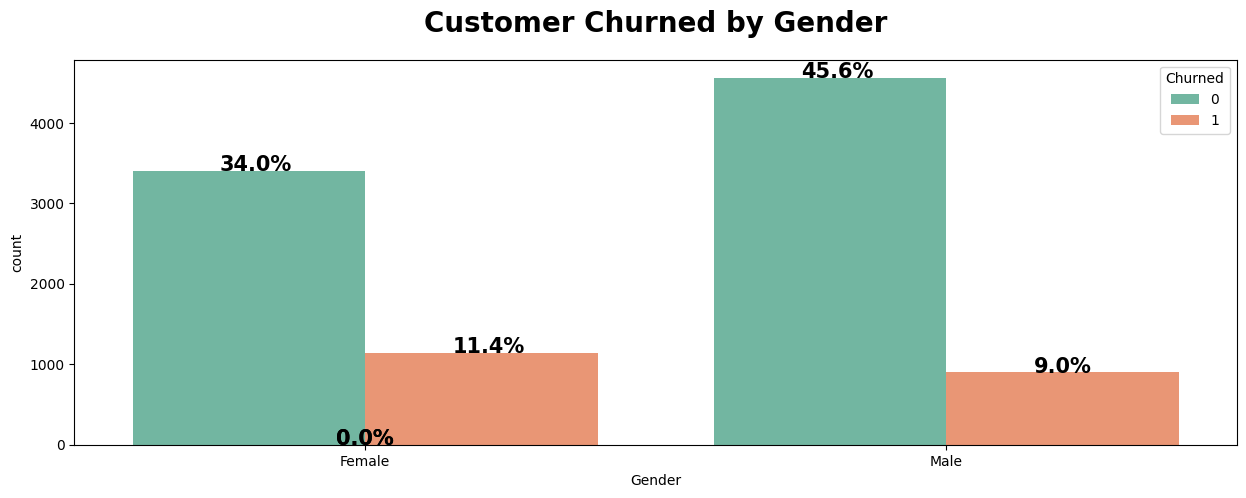

In [27]:
countplot('Gender')

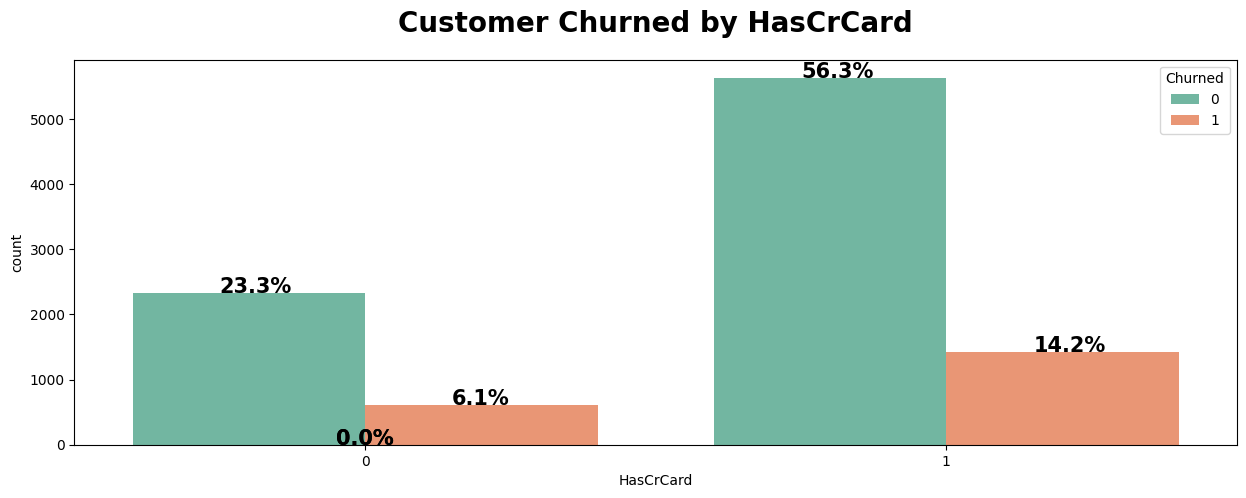

In [29]:
countplot('HasCrCard')

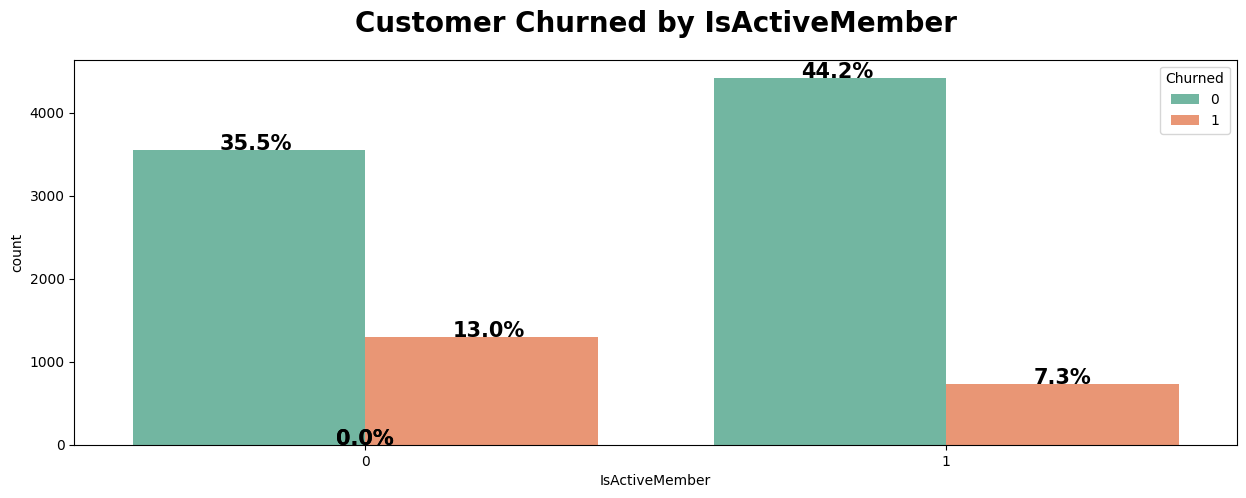

In [31]:
countplot('IsActiveMember')

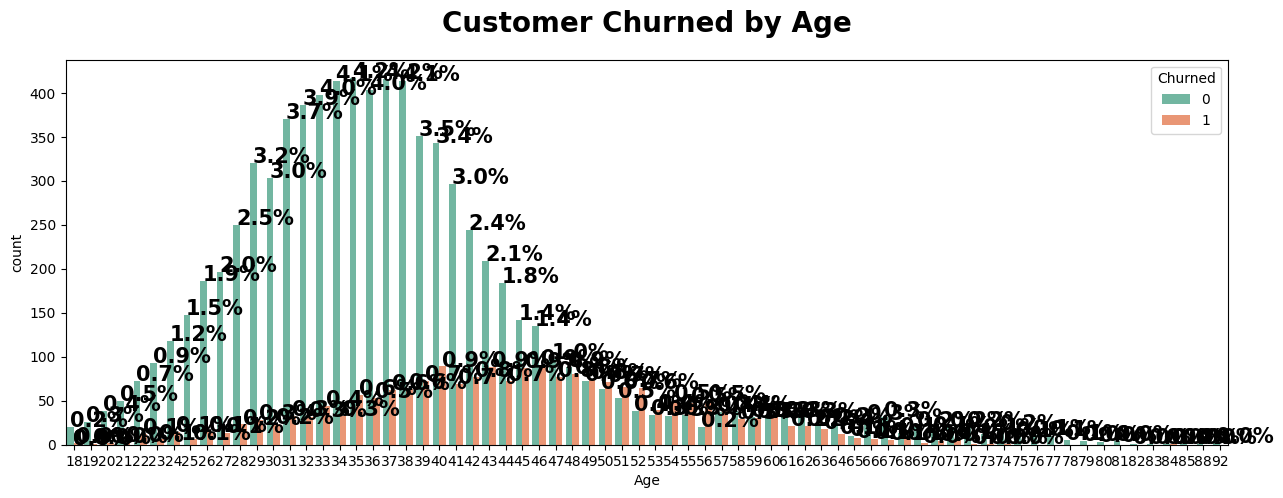

In [33]:
countplot('Age')

## Making A Function That Generates A Continous Plot (bar plot) For Any Given Column

In [35]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=dataset,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(y= column,data=dataset,hue="Churned" ,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

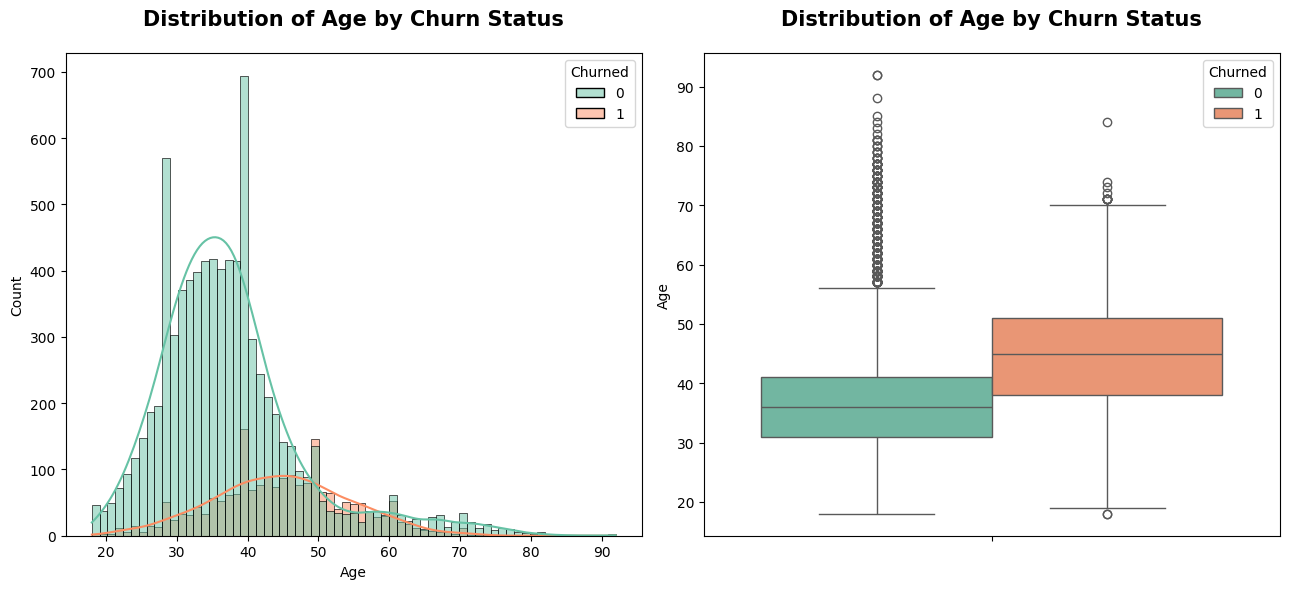

In [37]:
continous_plot('Age')

In [39]:
dataset = dataset.drop(['CustomerId','RowNumber','Surname'], axis=1)

## Encoding The The Categorical Data

In [41]:
encoder = LabelEncoder()
dataset['Geography'] = encoder.fit_transform(dataset['Geography'])
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])

In [43]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [45]:
dataset.shape

(10000, 11)

## Splitting The Datasets To Matrix of Features (X) & Independent Vector (y)

In [47]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [49]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Trying Models And Evaluating Thier Score to 

In [51]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_predKNN=KNN_classifier.predict(X_test)

In [55]:
cm = confusion_matrix(y_test,y_predKNN)
print(cm)

[[1853  138]
 [ 456   53]]


In [57]:
KNNaccuracy = accuracy_score(y_test,y_predKNN)
KNNaccuracy

0.7624

In [59]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_predDT=DT_classifier.predict(X_test)

In [63]:
cm = confusion_matrix(y_test,y_predDT)
print(cm)

[[1702  289]
 [ 229  280]]


In [65]:
DTaccuracy=accuracy_score(y_test,y_predDT)
DTaccuracy

0.7928

In [67]:
RF_classifier = RandomForestClassifier(n_estimators=100,max_depth=None)
RF_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_predRF=RF_classifier.predict(X_test)

In [71]:
cm = confusion_matrix(y_test,y_predRF)
print(cm)

[[1905   86]
 [ 257  252]]


In [73]:
RFaccuracy=accuracy_score(y_test,y_predRF)
RFaccuracy

0.8628

In [75]:
GB_classifier=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
GB_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [77]:
y_predGB=GB_classifier.predict(X_test)

In [79]:
cm = confusion_matrix(y_test,y_predGB)
print(cm)

[[1906   85]
 [ 257  252]]


In [81]:
GBaccuracy=accuracy_score(y_test,y_predGB)
GBaccuracy

0.8632

In [83]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [85]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,y_train)

LogisticRegression()

In [87]:
y_predLR=LR_classifier.predict(X_test)

In [89]:
cm = confusion_matrix(y_test,y_predLR)
print(cm)

[[1926   65]
 [ 423   86]]


In [91]:
LRaccuracy=accuracy_score(y_test,y_predLR)
LRaccuracy

0.8048